# Predicting suitable skin type from the cosmetics

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import re
import warnings
warnings.filterwarnings("ignore") 

In [6]:
d=pd.read_excel("skin type1.xlsx")
d.head()

,Label,brand,name,price1,price,rank,ingredients,Column1,Column4,Column7,Column10,Column13,Column16,Column19,skin_type1,skin_type
0,moisturizing-cream-oils-mists,LA MER,Crème de la Mer,$175.00,175.00,4.1,"Algae (Seaweed) Extract, Mineral Oil, Petrolat...",Normal,Oily,Combination,Dry,Sensitive,NaN,NaN,"Normal, Oily, Combination, Dry, Sensitive, ,","Normal, Oily, Combination, Dry, Sensitive"
1,moisturizing-cream-oils-mists,SK-II,Facial Treatment Essence,179,179,4.1,"-Pitera™: A bio-ingredient rich in vitamins, o...",Normal,Oily,Combination,Dry,Sensitive,NaN,NaN,"Normal, Oily, Combination, Dry, Sensitive, ,","Normal, Oily, Combination, Dry, Sensitive"
2,moisturizing-cream-oils-mists,DRUNK ELEPHANT,Protini™ Polypeptide Cream,$68.00,68.00,4.4,-9 Signal Peptide Complex \n-Pygmy Waterlily S...,Normal,Oily,Combination,Dry,NaN,NaN,NaN,"Normal, Oily, Combination, Dry, , ,","Normal, Oily, Combination, Dry ,"
3,moisturizing-cream-oils-mists,LA MER,The Moisturizing Soft Cream,$175.00,175.00,3.8,"Algae (Seaweed) Extract, Cyclopentasiloxane, P...",Normal,Oily,Combination,Dry,Sensitive,NaN,NaN,"Normal, Oily, Combination, Dry, Sensitive, ,","Normal, Oily, Combination, Dry, Sensitive"
4,moisturizing-cream-oils-mists,IT COSMETICS,Your Skin But Better™ CC+™ Cream with SPF 50+,$38.00,38.00,4.1,-Collagen: Supports skin elasticity for a yout...,Full,Sensitive,Normal,Dry,Combination,Oily,Natural,"Full, Sensitive, Normal, Dry, Combination, Oil...","Full, Sensitive, Normal, Dry, Combination, Oil..."


In [7]:
d.shape

(1630, 16)

In [8]:
type(d.price)

pandas.core.series.Series

In [9]:
d.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1630 entries, 0 to 1629
Data columns (total 16 columns):
Label          1630 non-null object
brand          1626 non-null object
name           1626 non-null object
price1         1626 non-null object
price          1626 non-null object
rank           1624 non-null float64
ingredients    1625 non-null object
Column1        1113 non-null object
Column4        1106 non-null object
Column7        1053 non-null object
Column10       975 non-null object
Column13       731 non-null object
Column16       15 non-null object
Column19       9 non-null object
skin_type1     1630 non-null object
skin_type      1630 non-null object
dtypes: float64(1), object(15)
memory usage: 203.8+ KB


In [10]:
d=d.drop_duplicates()
d.shape

(1629, 16)

In [11]:
d=d.drop(['price1','Column1','Column4','Column7','Column10','Column13','Column16','Column19','skin_type1'], axis=1)
d.head()

,Label,brand,name,price,rank,ingredients,skin_type
0,moisturizing-cream-oils-mists,LA MER,Crème de la Mer,175.00,4.1,"Algae (Seaweed) Extract, Mineral Oil, Petrolat...","Normal, Oily, Combination, Dry, Sensitive"
1,moisturizing-cream-oils-mists,SK-II,Facial Treatment Essence,179,4.1,"-Pitera™: A bio-ingredient rich in vitamins, o...","Normal, Oily, Combination, Dry, Sensitive"
2,moisturizing-cream-oils-mists,DRUNK ELEPHANT,Protini™ Polypeptide Cream,68.00,4.4,-9 Signal Peptide Complex \n-Pygmy Waterlily S...,"Normal, Oily, Combination, Dry ,"
3,moisturizing-cream-oils-mists,LA MER,The Moisturizing Soft Cream,175.00,3.8,"Algae (Seaweed) Extract, Cyclopentasiloxane, P...","Normal, Oily, Combination, Dry, Sensitive"
4,moisturizing-cream-oils-mists,IT COSMETICS,Your Skin But Better™ CC+™ Cream with SPF 50+,38.00,4.1,-Collagen: Supports skin elasticity for a yout...,"Full, Sensitive, Normal, Dry, Combination, Oil..."


In [12]:
d.dropna()
d.shape

(1629, 7)

In [13]:
d.Label.value_counts()

moisturizing-cream-oils-mists          300
cleanser                               300
facial-treatments                      300
face-mask                              299
eye-treatment-dark-circle-treatment    217
sunscreen-sun-protection               213
Name: Label, dtype: int64

In [14]:
# renaming the labels
d.Label=d.Label.replace({'moisturizing-cream-oils-mists':'Moisturizer','eye-treatment-dark-circle-treatment':'Eye treatment',
                    'face-mask ':'Face mask','facial-treatments':'Facial treatments',
                    'sunscreen-sun-protection':'Sunscreen'})

In [15]:
d.head()

,Label,brand,name,price,rank,ingredients,skin_type
0,Moisturizer,LA MER,Crème de la Mer,175.00,4.1,"Algae (Seaweed) Extract, Mineral Oil, Petrolat...","Normal, Oily, Combination, Dry, Sensitive"
1,Moisturizer,SK-II,Facial Treatment Essence,179,4.1,"-Pitera™: A bio-ingredient rich in vitamins, o...","Normal, Oily, Combination, Dry, Sensitive"
2,Moisturizer,DRUNK ELEPHANT,Protini™ Polypeptide Cream,68.00,4.4,-9 Signal Peptide Complex \n-Pygmy Waterlily S...,"Normal, Oily, Combination, Dry ,"
3,Moisturizer,LA MER,The Moisturizing Soft Cream,175.00,3.8,"Algae (Seaweed) Extract, Cyclopentasiloxane, P...","Normal, Oily, Combination, Dry, Sensitive"
4,Moisturizer,IT COSMETICS,Your Skin But Better™ CC+™ Cream with SPF 50+,38.00,4.1,-Collagen: Supports skin elasticity for a yout...,"Full, Sensitive, Normal, Dry, Combination, Oil..."


In [16]:
d['ingredients'][0]

'Algae (Seaweed) Extract, Mineral Oil, Petrolatum, Glycerin, Isohexadecane, Microcrystalline Wax, Lanolin Alcohol, Citrus Aurantifolia (Lime) Extract, Sesamum Indicum (Sesame) Seed Oil, Eucalyptus Globulus (Eucalyptus) Leaf Oil, Sesamum Indicum (Sesame) Seed Powder, Medicago Sativa (Alfalfa) Seed Powder, Helianthus Annuus (Sunflower) Seedcake, Prunus Amygdalus Dulcis (Sweet Almond) Seed Meal, Sodium Gluconate, Copper Gluconate, Calcium Gluconate, Magnesium Gluconate, Zinc Gluconate, Magnesium Sulfate, Paraffin, Tocopheryl Succinate, Niacin, Water, Beta-Carotene, Decyl Oleate, Aluminum Distearate, Octyldodecanol, Citric Acid, Cyanocobalamin, Magnesium Stearate, Panthenol, Limonene, Geraniol, Linalool, Hydroxycitronellal, Citronellol, Benzyl Salicylate, Citral, Sodium Benzoate, Alcohol Denat., Fragrance.\n\nPlease be aware that ingredient lists may change or vary from time to time. Please refer to the ingredient list on the product package you receive for the most up to date list of ingr

In [17]:
d['ingredients'][4]

'-Collagen: Supports skin elasticity for a youthful, smooth appearance.\n-Peptides: Help reduce the appearance of wrinkles and support natural collagen for the look of smoother, firmer skin.\n-Niacin: Promotes a more even appearance and helps combat the look of blemishes and hyperpigmentation.\n-Antioxidants: Reduce and protect against free-radical damage, which can cause skin inflammation and aging.\n\nWater, Snail Secretion Filtrate, Phenyl Trimethicone, Dimethicone, Butylene Glycol, Butylene Glycol Dicaprylate/Dicaprate, Orbignya Oleifera Seed Oil, Butyloctyl Salicylate, Cetyl Peg/Ppg-10/1 Dimethicone, Cyclopentasiloxane, Cyclohexasiloxane, Magnesium Sulfate, Polyglyceryl-4 Isostearate, Dimethicone/Vinyl Dimethicone Crosspolymer, Aluminum Hydroxide, Hexyl Laurate, Stearic Acid, Calcium Stearate, Caprylyl Glycol, Triethoxycaprylylsilane, Ethylhexylglycerin, Citrus Medica Limonum (Lemon) Peel Oil, Tocopheryl Acetate, Sorbitan Isostearate, Phenoxyethanol, Citrus Aurantium Bergamia (Ber

In [18]:
d['ingredients']=d['ingredients'].astype(str)

In [19]:
# splitting the ingredients
ing = [t.split('\r\n\r\n') for t in d['ingredients']]

In [20]:
# removing unwanted words
remove = ['\r\n', '-\w+: ', 'Please', 'No Info', 'Help'
           'This product','Visit','Promotes','Reduce','Which']

In [21]:
for i in range(len(d)):
    num = len(ing[i])
    for j in range(num):
        if all(x not in ing[i][j] for x in remove):
           d['ingredients'][i] = ing[i][j]

In [22]:
# tokenizing the ingredients
ingredient_idx = {}        # creating dictionary of ingredients
corpus = []                
idx = 0 
for i in range(len(d)):    
    ingredients = d['ingredients'][i]
    ingredients_lower = ingredients.lower()
    tokens = ingredients_lower.split(', ')
    corpus.append(tokens)
    for ingredient in tokens:
        if ingredient not in ingredient_idx:
            ingredient_idx[ingredient] = idx
            idx += 1

In [23]:
# Get the number of items and tokens 
M = len(d)               
N = len(ingredient_idx)     

# Initialize a matrix of zeros
A = np.zeros((M, N))

In [24]:
def encoder(tokens):
    x = np.zeros(N)    
    for ingredient in tokens:
        # Get the index for each ingredient
        idx = ingredient_idx[ingredient]
        # Put 1 at the corresponding indices
        x[idx] = 1
    return x

In [25]:
i = 0
for tokens in corpus:
    A[i, :] = encoder(tokens)
    i += 1

In [26]:
A.shape

(1629, 9123)

In [27]:
A

array([[1., 1., 1., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 1., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.]])

In [28]:
df=pd.DataFrame(A)
df.head()

,0,1,2,3,4,5,6,7,8,9,...,9113,9114,9115,9116,9117,9118,9119,9120,9121,9122
0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [29]:
data=pd.concat([d,df],axis=1)
data.head()

,Label,brand,name,price,rank,ingredients,skin_type,0,1,2,...,9113,9114,9115,9116,9117,9118,9119,9120,9121,9122
0,Moisturizer,LA MER,Crème de la Mer,175.00,4.1,"Algae (Seaweed) Extract, Mineral Oil, Petrolat...","Normal, Oily, Combination, Dry, Sensitive",1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,Moisturizer,SK-II,Facial Treatment Essence,179,4.1,"-Pitera™: A bio-ingredient rich in vitamins, o...","Normal, Oily, Combination, Dry, Sensitive",0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Moisturizer,DRUNK ELEPHANT,Protini™ Polypeptide Cream,68.00,4.4,-9 Signal Peptide Complex \n-Pygmy Waterlily S...,"Normal, Oily, Combination, Dry ,",0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Moisturizer,LA MER,The Moisturizing Soft Cream,175.00,3.8,"Algae (Seaweed) Extract, Cyclopentasiloxane, P...","Normal, Oily, Combination, Dry, Sensitive",1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Moisturizer,IT COSMETICS,Your Skin But Better™ CC+™ Cream with SPF 50+,38.00,4.1,-Collagen: Supports skin elasticity for a yout...,"Full, Sensitive, Normal, Dry, Combination, Oil...",0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [30]:
data1=pd.concat([df,d],axis=1)
data1.head()

,0,1,2,3,4,5,6,7,8,9,...,9120,9121,9122,Label,brand,name,price,rank,ingredients,skin_type
0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,Moisturizer,LA MER,Crème de la Mer,175.00,4.1,"Algae (Seaweed) Extract, Mineral Oil, Petrolat...","Normal, Oily, Combination, Dry, Sensitive"
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,Moisturizer,SK-II,Facial Treatment Essence,179,4.1,"-Pitera™: A bio-ingredient rich in vitamins, o...","Normal, Oily, Combination, Dry, Sensitive"
2,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,Moisturizer,DRUNK ELEPHANT,Protini™ Polypeptide Cream,68.00,4.4,-9 Signal Peptide Complex \n-Pygmy Waterlily S...,"Normal, Oily, Combination, Dry ,"
3,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,...,0.0,0.0,0.0,Moisturizer,LA MER,The Moisturizing Soft Cream,175.00,3.8,"Algae (Seaweed) Extract, Cyclopentasiloxane, P...","Normal, Oily, Combination, Dry, Sensitive"
4,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,Moisturizer,IT COSMETICS,Your Skin But Better™ CC+™ Cream with SPF 50+,38.00,4.1,-Collagen: Supports skin elasticity for a yout...,"Full, Sensitive, Normal, Dry, Combination, Oil..."


In [31]:
data1.shape

(1630, 9130)

In [32]:
data1=data1.drop(['ingredients'],axis=1)
data1.head()

,0,1,2,3,4,5,6,7,8,9,...,9119,9120,9121,9122,Label,brand,name,price,rank,skin_type
0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,Moisturizer,LA MER,Crème de la Mer,175.00,4.1,"Normal, Oily, Combination, Dry, Sensitive"
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,Moisturizer,SK-II,Facial Treatment Essence,179,4.1,"Normal, Oily, Combination, Dry, Sensitive"
2,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,Moisturizer,DRUNK ELEPHANT,Protini™ Polypeptide Cream,68.00,4.4,"Normal, Oily, Combination, Dry ,"
3,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,Moisturizer,LA MER,The Moisturizing Soft Cream,175.00,3.8,"Normal, Oily, Combination, Dry, Sensitive"
4,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,Moisturizer,IT COSMETICS,Your Skin But Better™ CC+™ Cream with SPF 50+,38.00,4.1,"Full, Sensitive, Normal, Dry, Combination, Oil..."


In [33]:
data1.head()

,0,1,2,3,4,5,6,7,8,9,...,9119,9120,9121,9122,Label,brand,name,price,rank,skin_type
0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,Moisturizer,LA MER,Crème de la Mer,175.00,4.1,"Normal, Oily, Combination, Dry, Sensitive"
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,Moisturizer,SK-II,Facial Treatment Essence,179,4.1,"Normal, Oily, Combination, Dry, Sensitive"
2,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,Moisturizer,DRUNK ELEPHANT,Protini™ Polypeptide Cream,68.00,4.4,"Normal, Oily, Combination, Dry ,"
3,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,Moisturizer,LA MER,The Moisturizing Soft Cream,175.00,3.8,"Normal, Oily, Combination, Dry, Sensitive"
4,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,Moisturizer,IT COSMETICS,Your Skin But Better™ CC+™ Cream with SPF 50+,38.00,4.1,"Full, Sensitive, Normal, Dry, Combination, Oil..."


In [34]:
data3=data1.drop(['brand','name'],axis=1)

In [35]:
data3.head()

,0,1,2,3,4,5,6,7,8,9,...,9117,9118,9119,9120,9121,9122,Label,price,rank,skin_type
0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,Moisturizer,175.00,4.1,"Normal, Oily, Combination, Dry, Sensitive"
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,Moisturizer,179,4.1,"Normal, Oily, Combination, Dry, Sensitive"
2,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,Moisturizer,68.00,4.4,"Normal, Oily, Combination, Dry ,"
3,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,Moisturizer,175.00,3.8,"Normal, Oily, Combination, Dry, Sensitive"
4,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,Moisturizer,38.00,4.1,"Full, Sensitive, Normal, Dry, Combination, Oil..."


In [36]:
df=df.rename(columns={"df.columns":"keys"})
df.head()

,0,1,2,3,4,5,6,7,8,9,...,9113,9114,9115,9116,9117,9118,9119,9120,9121,9122
0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


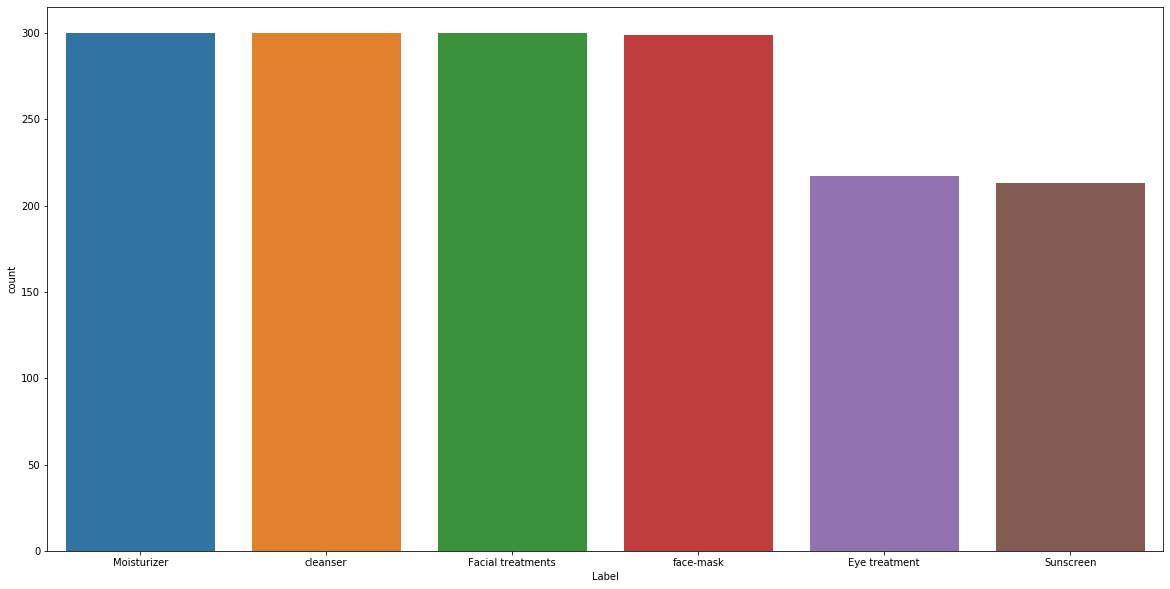

In [37]:
plt.figure(figsize=(20,10))
sns.countplot(x='Label',data=d)
plt.show()

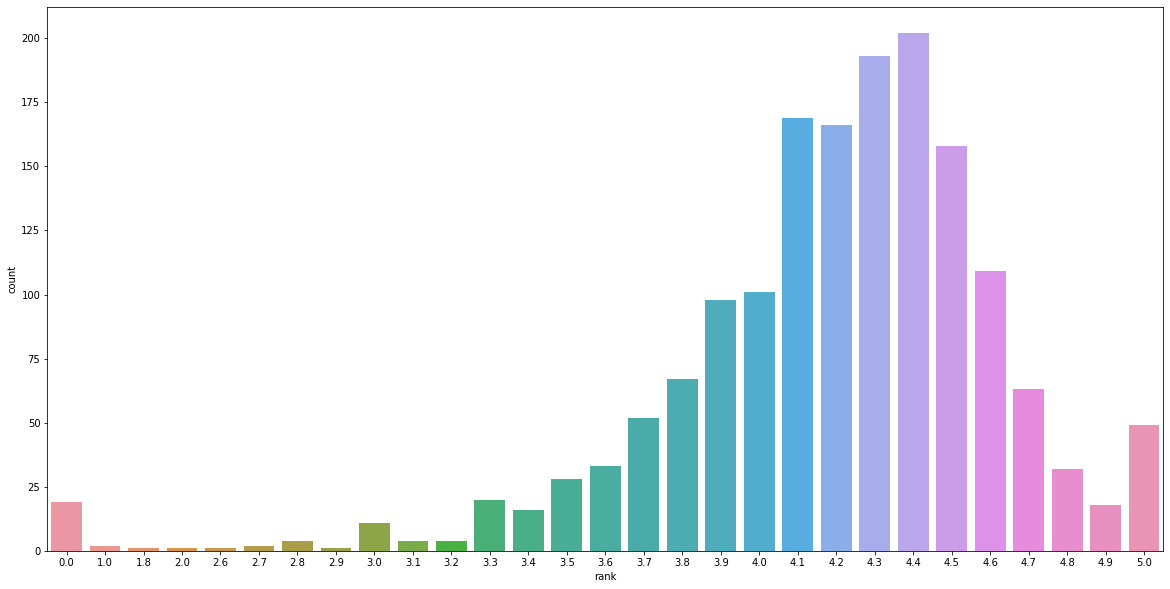

In [38]:
plt.figure(figsize=(20,10))
sns.countplot(x='rank',data=d)
plt.show()

Text(0, 0.5, 'Frequency')

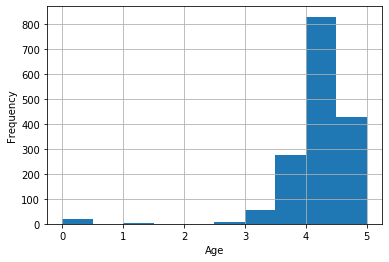

In [39]:
d['rank'].hist()
plt.xlabel('Age')
plt.ylabel('Frequency')

In [40]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import LinearSVC
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, recall_score, precision_score
from sklearn.metrics import classification_report
from sklearn.naive_bayes import GaussianNB

In [41]:
X = A
y = d.iloc[:, -1].values

In [42]:
d.iloc[:,-1]

0             Normal, Oily, Combination, Dry, Sensitive  
1             Normal, Oily, Combination, Dry, Sensitive  
2                      Normal, Oily, Combination, Dry  , 
3             Normal, Oily, Combination, Dry, Sensitive  
4       Full, Sensitive, Normal, Dry, Combination, Oil...
5                Normal, Oily, Combination, Sensitive  , 
6                      Normal, Oily, Combination, Dry  , 
7                      Normal, Oily, Combination, Dry  , 
8             Normal, Oily, Combination, Dry, Sensitive  
9                                                        
10                                                       
11            Normal, Oily, Combination, Dry, Sensitive  
12                          Normal, Oily, Combination    
13            Normal, Oily, Combination, Dry, Sensitive  
14            Normal, Oily, Combination, Dry, Sensitive  
15                     Normal, Oily, Combination, Dry  , 
16            Normal, Oily, Combination, Dry, Sensitive  
17            

In [43]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0)

In [44]:
ls = LinearSVC()
ls.fit(X_train,y_train)
# Final Prediction
y_pred=ls.predict(X_test)
acc=accuracy_score(y_test, y_pred)
print("Accuracy: ",acc*100,'%' )
print("\n Classification report:\n{}".format(classification_report(y_test, y_pred)))

Accuracy:  50.49019607843137 %

 Classification report:
                                                          precision    recall  f1-score   support

                                                               0.46      0.60      0.52       125
                                  Combination, Dry    ,        0.00      0.00      0.00         1
                         Combination, Dry, Sensitive           0.00      0.00      0.00         2
                                               Dry             0.00      0.00      0.00         1
                                    Dry, Sensitive    ,        0.00      0.00      0.00         2
           Full, Normal, Dry, Combination, Oily, Matte,        0.00      0.00      0.00         1
Full, Sensitive, Normal, Dry, Combination, Oily, Natural       0.00      0.00      0.00         1
Full, Sensitive, Normal, Dry, Combination, Oily, Radiant       0.00      0.00      0.00         1
        Light, Sensitive, Normal, Combination, Radiant       

In [45]:
dt = DecisionTreeClassifier()
dt.fit(X_train,y_train)
# Final Prediction
y_pred=dt.predict(X_test)
acc=accuracy_score(y_test, y_pred)
print("Accuracy: ",acc*100,'%' )
print("\n Classification report:\n{}".format(classification_report(y_test, y_pred)))

Accuracy:  50.245098039215684 %

 Classification report:
                                                           precision    recall  f1-score   support

                                                                0.51      0.52      0.52       125
                                   Combination, Dry    ,        0.00      0.00      0.00         1
                          Combination, Dry, Sensitive           0.00      0.00      0.00         2
                                                Dry             0.00      0.00      0.00         1
                                     Dry, Sensitive    ,        0.00      0.00      0.00         2
            Full, Normal, Dry, Combination, Oily, Matte,        0.00      0.00      0.00         1
 Full, Sensitive, Normal, Dry, Combination, Oily, Natural       0.00      0.00      0.00         1
 Full, Sensitive, Normal, Dry, Combination, Oily, Radiant       0.00      0.00      0.00         1
         Light, Sensitive, Normal, Combination, Rad

In [46]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=50)

In [47]:
ls = LinearSVC()
ls.fit(X_train,y_train)
# Final Prediction
y_pred=ls.predict(X_test)
acc=accuracy_score(y_test, y_pred)
print("Accuracy: ",acc*100,'%' )

Accuracy:  60.42944785276073 %


In [48]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier(n_estimators=400,min_samples_split=4,min_samples_leaf=1,max_depth=100,random_state=50)
rf.fit(X_train,y_train)
# Final Prediction
y_pred=rf.predict(X_test)
acc=accuracy_score(y_test, y_pred)
print("Accuracy: ",acc*100,'%' )

Accuracy:  58.282208588957054 %


In [49]:
nb=GaussianNB()
nb.fit(X_train,y_train)
# Final Prediction
y_pred=nb.predict(X_test)
acc=accuracy_score(y_test, y_pred)
print("Accuracy: ",acc*100,'%' )

Accuracy:  55.828220858895705 %
